# Notebook 03:

# Calculating theoretical IR radiation:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle

C:\Users\merto\AppData\Local\Temp\ipykernel_6956\3956361213.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Define trigonometric functions:

sin = lambda x: np.sin(np.deg2rad(x))
cos = lambda x: np.cos(np.deg2rad(x))

tan = lambda x: np.tan(np.deg2rad(x))
cot = lambda x: 1 / tan(x)

arcsin = lambda x: np.rad2deg(np.arcsin(x))
arccos = lambda x: np.rad2deg(np.arccos(x))

In [3]:
G_sc = 1367  #Solar constant.

def H_0(G_sc, n, phi):
    '''
    Calculates daily Mega joules per m2 per day.

    This function is from the book:
    "Solar Engineering of Thermal Processes"
    by "John A. Duffie"

    parameters
    ----------

    G_sc: `int`
        Solar constant.
        
    n: `int`
        Days past from the beginig of the year.
        
    phi: `float`
        Latitude of the city.
        
    returns
    -------

    `float`
        daily Mega joules per m2 per day.
    '''
    
    teta = 23.45 * sin(360 * (284 + n) / 365)
    w_s = arccos(- tan(phi) * tan(teta))
    
    a = (24 * 3600 * G_sc) / 3.1416
    b = (1 + 0.033 * cos(360 * n / 365 ))
    c = cos(phi) * cos(teta) * sin(w_s) + 3.1416 * w_s * sin(phi) * sin(teta) / 180
    
    return (a * b * c) / 10**6

In [4]:
latitudes = {
"AHV" : 31.32, "ARD" : 38.24, "ARK" : 34.09, "BIR" : 32.87,
"BJN" : 37.47, "BND" : 27.20, "ESF" : 32.65, "GRG" : 36.84,
"HMD" : 34.80, "ILM" : 33.64, "JSK" : 25.66, "KRJ" : 35.84,
"KRM" : 30.28, "KRMS" : 34.33, "MSH" : 36.30, "ORO" : 37.55,
"QOM" : 34.64, "QZV" : 36.28, "SHZ" : 29.59, "SMN" : 35.58,
"TBR" : 38.08, "TEH" : 35.72, "YAS" : 30.66, "Yazd" : 31.90,
"ZHD" : 29.45, "ZNJ" : 36.68
}

In [5]:
#Build a DataFrame that holds theoretical ir iradiation of all cities.

days_of_year = [i+1 for i in range(366)]
theoretical_radiations = pd.DataFrame(columns=latitudes.keys(), index=days_of_year)

In [6]:
#Populate the theoretical_radiations.

for key, lat in latitudes.items():
    radiations = [H_0(G_sc, n, lat) for n in days_of_year]
    series = pd.Series(radiations, index=days_of_year)
    theoretical_radiations[key] = series

In [7]:
theoretical_radiations.head()

,AHV,ARD,ARK,BIR,BJN,BND,ESF,GRG,HMD,ILM,...,QOM,QZV,SHZ,SMN,TBR,TEH,YAS,Yazd,ZHD,ZNJ
1,19.165726,14.902593,17.468129,18.217826,15.379705,21.652331,18.352701,15.769844,17.030620,17.744984,...,17.129283,16.116383,20.216349,16.549125,15.001750,16.462620,19.567535,18.811692,20.300988,15.868882
2,19.217618,14.956795,17.521201,18.270418,15.433759,21.701900,18.405199,15.823755,17.083942,17.797886,...,17.182550,16.170152,20.267345,16.602694,15.055924,16.516231,19.619099,18.863858,20.351906,15.922754
3,19.273690,15.015438,17.578577,18.327262,15.492233,21.755419,18.461941,15.882068,17.141595,17.855075,...,17.240143,16.228304,20.322431,16.660625,15.114535,16.574208,19.674810,18.920231,20.406906,15.981023
4,19.333922,15.078507,17.640240,18.388341,15.555113,21.812864,18.522907,15.944768,17.203564,17.916531,...,17.302045,16.290825,20.381585,16.722899,15.177567,16.636533,19.734646,18.980794,20.465967,16.043673
5,19.398292,15.145987,17.706170,18.453633,15.622381,21.874211,18.588075,16.011837,17.269828,17.982235,...,17.368237,16.357697,20.444784,16.789499,15.245006,16.703190,19.798587,19.045523,20.529065,16.110688


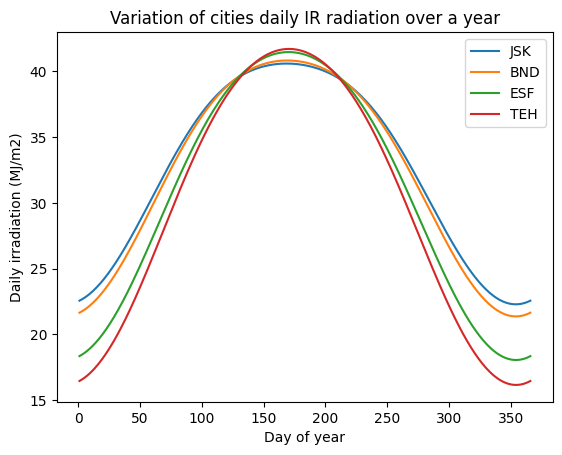

In [8]:
for city in ['JSK', 'BND', 'ESF', 'TEH']:
    plt.plot(theoretical_radiations[city], label=city)

plt.xlabel('Day of year')
plt.ylabel('Daily irradiation (MJ/m2)')
plt.title('Variation of cities daily IR radiation over a year')
plt.legend()
pass

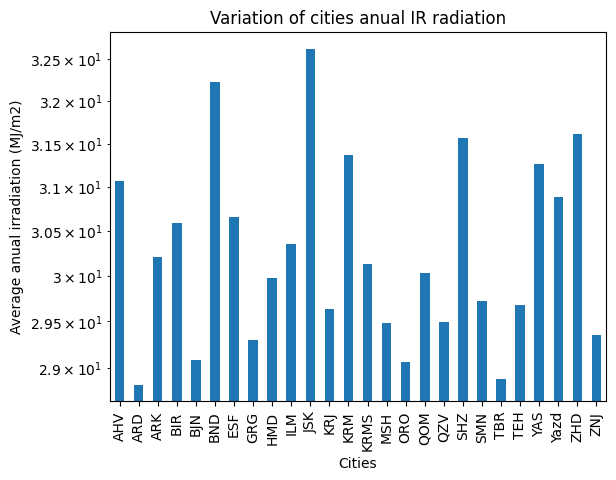

In [9]:
mean_ir = theoretical_radiations.mean()

ax = mean_ir.plot.bar()
ax.set_yscale('log')
ax.set_title('Variation of cities anual IR radiation')
ax.set_xlabel('Cities')
ax.set_ylabel('Average anual irradiation (MJ/m2)')
pass

In [10]:
#Pickling the theoretical_radiations:

with open(r'..\data\external\03_theoretical_radiation\theoretical_radiations.pkl', 'wb') as f:
    pickle.dump(theoretical_radiations, f)

## Conclusion:
In this notebook:

1. Theoretical IR radiation of each city for each day of year is calculated.
2. The data is stored as a DataFrame named theoretical_radiations.
3. Finaly theoretical_radiations gets pickled.